Lecture 5 (24/02/2020)

Lecture 5 covers the simulation of oscilating systems using pyhton. Through the excercises it will become clear that the normal integration routine of forward Euler is not accurate to simulate an oscilating system without propagating a large amout of error over time. The scipy module will be used to instead use the odeint method for integration which has proven to be many times more accurate then forward Euler.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math, time, sys, os

In [29]:
# All SI units
mass = 12
k = 100 #Spring constant
g = 9.81
dt = 0.001
t0 = 0
t1 = 10
y0 = 0.2 #Initial displacement
v0 = 0.1 #Initial velocity

# State variables
t = np.linspace(t0, t1, round(1+(t1-t0)/dt))
y_num = np.zeros(len(t))
v_num = np.zeros(len(t))
y_num[0] = y0
v_num[0] = v0

# Energy variables
Ekin = np.zeros(len(t))
Epot = np.zeros(len(t))

To obtain $a$ the free body diagram first needs to be drawn. From there the equation of motion can be derrived. This looks like the following:

$\Sigma F_y = mg - ky = m\ddot{y}$

$\ddot{y} = g - \frac{ky}{m}$

In [30]:
def derrivative(state, t):
    """Takes an array state with entries 0 (displacement) and 1 (velocity) as input and outputs an              array with velocity and acceleration""" 
    y = state[0]
    v = state[1]
    a = g -(k*y)/mass
    return [v, a]

In [31]:
for i in range(len(t)-1):
    derriv = derrivative([y_num[i], v_num[i]], t[i])
    y_num[i+1] = y_num[i] + derriv[0]*dt
    v_num[i+1] = v_num[i] + derriv[1]*dt

    # Checking for 0, if the value is positve and becomes negative zero is passed and vice versa.
    if np.sign(y_num[i]) != np.sign(y_num[i+1]):
        print(t[i+1])

The position of the spring at t=10 is 2.0017963233063836


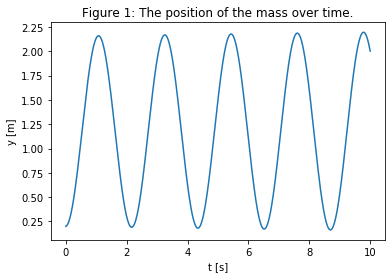

In [32]:
plt.plot(t, y_num)
plt.xlabel('t [s]')
plt.ylabel('y [m]')
plt.title('Figure 1: The position of the mass over time.')

print('The position of the spring at t=10 is {}'.format(y_num[-1]))

Besides the state of the system and the forces acting on the system we are also interested in the energy of the system. An oscilating system like this has 2 forms of energy. Kinetic energy denoted as $E_{kin}$ and potential energy denoted by $E_{pot}$. These 2 are calculate as follows:

$E_{kin} = \frac{1}{2}mv^2$

$E_{pot} = \frac{1}{2}ks^2 + mgh$

Using ht enumerical solution these 2 will be calculated and graphed below.

The kinetic energy at t=10 is 17.962553433913087


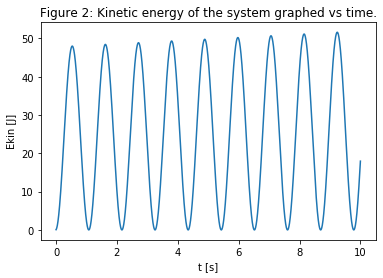

In [33]:
for i in range(len(t)):
    Ekin[i] = 0.5*mass*v_num[i]**2

plt.title('Figure 2: Kinetic energy of the system graphed vs time.')
plt.plot(t, Ekin)
plt.xlabel('t [s]')
plt.ylabel('Ekin [J]')

print('The kinetic energy at t=10 is {}'.format(Ekin[-1]))

The difference in total potential energy between t=0 and t=10 is -13.748037179479706


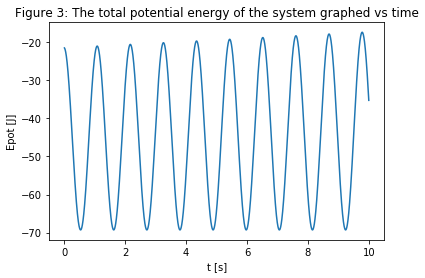

In [34]:
for i in range(len(t)):
    Epot[i] = 0.5*k*y_num[i]**2 - mass*g*y_num[i]

plt.title('Figure 3: The total potential energy of the system graphed vs time')
plt.plot(t, Epot)
plt.xlabel('t [s]')
plt.ylabel('Epot [J]')

print('The difference in total potential energy between t=0 and t=10 is {}'.format(Epot[-1]-Epot[0]))

When the total sum of the energies in the system is graphed something interesting happens. Intuitivly we would think the total energy should stay constant, since there are no external forces acting on the system and the laws of thermodynamics excist. However when the energy sum is graphed it is evident that the total energy seems to be increasing. Since we know this is not what's happening we can deduce that this must be in fact the effect of Forward Euler integration propagating over time.

Text(0.5, 1.0, 'Figure 4: The total energy of the system graphed vs time.')

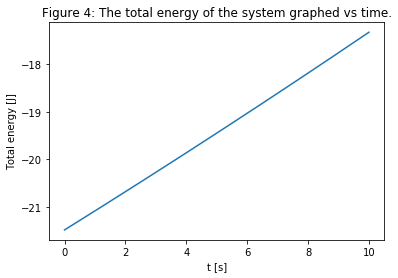

In [35]:
plt.plot(t, Ekin+Epot)
plt.xlabel('t [s]')
plt.ylabel('Total energy [J]')
plt.title('Figure 4: The total energy of the system graphed vs time.')

The mathematics of numerical methods and numerical integration is a science in and off itself. There will be no deep-dive into this topic since it is not particularly relevant how it works for now. However the scipy.integrate module has some of these methods build in for us to use, making routines like this much easier. If you want to know how it works you can look up the documentation of the scipy library, but we can treat it is a black box for now. The method we are interested in is the odeint method. odeint refers to Ordinary Differential Equation Integration. This method will be (as shown below) much more accurate than the regular Forward Euler integration. On top of that it's much easier to write code for as well!

Text(0.5, 1.0, 'Figure 5: The total energy of the system vs time using a different numerical method')

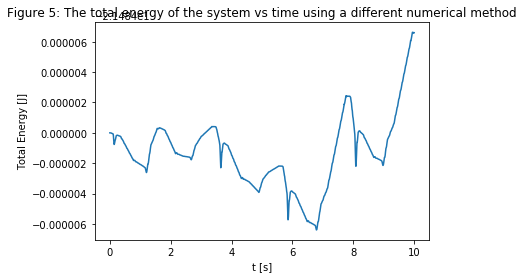

In [36]:
result = integrate.odeint(derrivative, [y0, v0], t)
y_num_2 = result[:,0]
v_num_2 = result[:,1]

for i in range(len(t)):
    Ekin[i] = 0.5*mass*v_num_2[i]**2

for i in range(len(t)):
    Epot[i] = 0.5*k*y_num_2[i]**2 - mass*g*y_num_2[i]

plt.plot(t, Ekin+Epot)
plt.xlabel('t [s]')
plt.ylabel('Total Energy [J]')
plt.title('Figure 5: The total energy of the system vs time using a different numerical method')